In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
match=pd.read_csv('deliveries.csv')

In [15]:
match.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [18]:
a=match.groupby('batsman')['batsman_runs'].count()

In [19]:
blist=list(a[a>300].index)

In [20]:
len(blist)

114

In [21]:
new=match[match['batsman'].isin(blist)]

In [22]:
new.shape

(127368, 21)

In [24]:
balls=new.groupby('batsman')['batsman_runs'].count()

In [25]:
runs=new.groupby('batsman')['batsman_runs'].sum()

In [26]:
strike_rate=(runs/balls)*100

In [27]:
strike_rate.sort_values(ascending=False)

batsman
AD Russell         164.000000
GJ Maxwell         157.564103
KH Pandya          153.354633
V Sehwag           148.827059
RR Pant            148.031496
AB de Villiers     145.129059
CH Gayle           144.194313
JC Buttler         140.800000
YK Pathan          140.751445
KA Pollard         140.621266
DA Warner          138.318401
HM Amla            138.038278
DA Miller          137.709251
JA Morkel          136.938202
Harbhajan Singh    135.194585
SK Raina           134.995548
SR Watson          134.838379
ST Jayasuriya      134.031414
AC Gilchrist       133.054662
MS Dhoni           132.835821
JR Hopes           132.802548
HH Pandya          132.679739
DR Smith           132.279534
KP Pietersen       132.058047
ML Hayden          131.942789
KM Jadhav          130.555556
SE Marsh           130.109775
NLTC Perera        130.061350
JP Faulkner        129.802956
JD Ryder           129.613734
                      ...    
IK Pathan          116.751269
S Badrinath        115.742972
DB

In [29]:
num_match=new.drop_duplicates(['match_id','batsman'])

In [32]:
matches=num_match.groupby('batsman')['batsman_runs'].count()

In [34]:
avg=runs/matches

In [36]:
avg=avg.reset_index()

In [37]:
strike_rate=strike_rate.reset_index()

In [39]:
newdf=strike_rate.merge(avg,on='batsman')

In [40]:
x=newdf.iloc[:,1:].values

In [41]:
x.shape

(114, 2)

In [42]:
from sklearn.cluster import KMeans

In [43]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

In [44]:
wcss

[22562.570981177756,
 12301.856572742969,
 8257.362368975513,
 6506.255314136059,
 5100.914834421803,
 4096.897018841317,
 3600.430857451826,
 3000.349265048045,
 2642.819911198887,
 2286.410000488271]

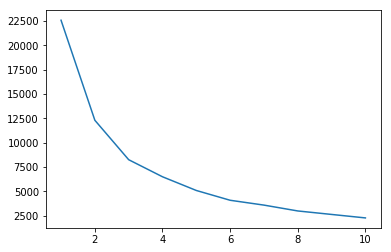

In [45]:
plt.plot(range(1,11),wcss)

In [46]:
#since we are confused about the elbow point, so we will choose wisely

In [54]:
km=KMeans(n_clusters=4)

In [55]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
y=km.predict(x)

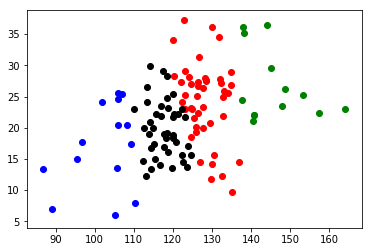

In [57]:
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.scatter(x[y==2,0],x[y==2,1],color="green")
plt.scatter(x[y==3,0],x[y==3,1],color="black")